In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

In [15]:
data = pd.read_csv('dataset.csv',header = None)
data_classes = ['R','M']
d = {'R':-1,'M':1}
data[60] = data[60].map(d, na_action='ignore')
data = data.sample(frac=1)
train, validate, test = np.split(data, [int(.7*len(data)), int(.8*len(data))])
X_train = train.drop(60, axis=1).to_numpy()
y_train = train[60].to_numpy()
X_validate = validate.drop(60, axis=1).to_numpy()
y_validate = validate[60].to_numpy()
X_test = test.drop(60, axis=1).to_numpy()
y_test = test[60].to_numpy()

poly = PolynomialFeatures(2)
X_train = poly.fit_transform(X_train)
X_validate = poly.fit_transform(X_validate)
X_test = poly.fit_transform(X_test)

# perceptron

In [3]:
class Perceptrons:
    def predict(self, X):
        return ((np.dot(self.add_bias(X), self.weights) >= 0)*2)-1
    
    def singlepredict(self, X):
        return ((np.dot(X, self.weights) >= 0) * 2)-1
    
    def fit(self, X, y,X_val,y_val, itr, lr):
        X = self.add_bias(X)
        X_val = self.add_bias(X_val)
        self.weights = np.zeros(X.shape[1])
        errors = []
        errors_val = []
        weight_list = []
        for _ in range(itr): 
            for i in range(X.shape[0]):
                self.weights += lr * np.dot((y[i] - self.singlepredict(X[i,:])), X[i])
            mysum_validation = np.abs((y_val - self.predict(X_val[:,1:])))
            errors_val.append(np.sum(mysum_validation))
            mysum = np.abs((y - self.predict(X[:,1:])))
            errors.append(np.sum(mysum)) 
            weight_list.append(self.weights)
        return errors,errors_val,weight_list
    
    def add_bias(self,X):
        return np.insert(X, 0, np.ones(X.shape[0]), axis=1)
    

accuracy of second order perceptron is: 0.8571428571428571


predict,-1,1
actual,,
-1,18,3
1,3,18


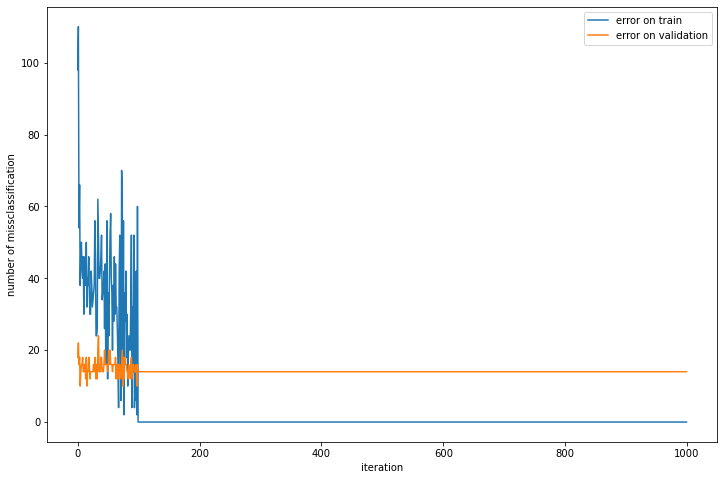

In [4]:
clf = Perceptrons()
error,error_val,weights_list = clf.fit(X_train,y_train,X_validate,y_validate,1000,0.001)
y_pred = clf.predict(X_test)


fig = plt.figure()
fig.set_size_inches(12,8)
ax = fig.add_subplot(1,1,1)
ax.plot(error,label='error on train')
ax.plot(error_val,label='error on validation')
ax.legend()
ax.set_xlabel('iteration')
ax.set_ylabel('number of missclassification')

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy


print("accuracy of second order perceptron is: " + str(accuracy(y_test,y_pred)))

def confusion_df(grand_truth, predicts):
    df = pd.DataFrame({'predict': predicts, 'actual': grand_truth, 'cnt': 1})
    return pd.crosstab(df.actual, df.predict)
confusion_df(y_test,y_pred)




In [42]:
acc_list = []
for i in range(30):
    data = pd.read_csv('dataset.csv',header = None)
    data_classes = ['R','M']
    d = {'R':-1,'M':1}
    data[60] = data[60].map(d, na_action='ignore')
    data = data.sample(frac=1)
    train, validate, test = np.split(data, [int(.7*len(data)), int(.8*len(data))])
    X_train = train.drop(60, axis=1).to_numpy()
    y_train = train[60].to_numpy()
    X_validate = validate.drop(60, axis=1).to_numpy()
    y_validate = validate[60].to_numpy()
    X_test = test.drop(60, axis=1).to_numpy()
    y_test = test[60].to_numpy()
    poly = PolynomialFeatures(2)
    X_train = poly.fit_transform(X_train)
    X_validate = poly.fit_transform(X_validate)
    X_test = poly.fit_transform(X_test)
    clf = Perceptrons()
    error,error_val,weights_list = clf.fit(X_train,y_train,X_validate,y_validate,1000,0.001)
    y_pred = clf.predict(X_test)
    acc_list.append(accuracy(y_test,y_pred))

print("accuracy of second order perceptron in 30 test is: " + str(np.mean(acc_list)))

accuracy of second order perceptron in 30 test is: 0.8198412698412698


In [7]:
class Perceptrons:
    def predict(self, X):
        return ((np.dot(self.add_bias(X), self.weights) >= 0)*2)-1
    
    def singlepredict(self, X):
        return ((np.dot(X, self.weights) >= 0) * 2)-1
    
    def fit(self, X, y,X_val,y_val, itr, lr):
        X = self.add_bias(X)
        X_val = self.add_bias(X_val)
        self.weights = np.zeros(X.shape[1])
        errors = []
        errors_val = []
        weight_list = []
        for _ in range(itr): 
            for i in range(X.shape[0]):
                self.weights += lr * np.dot((y[i] - self.singlepredict(X[i,:])), X[i])
            mysum_validation = np.abs((y_val - self.predict(X_val[:,1:])))
            errors_val.append(np.sum(mysum_validation))
            mysum = np.abs((y - self.predict(X[:,1:])))
            errors.append(np.sum(mysum)) 
            weight_list.append(self.weights)
        return errors,errors_val,weight_list
    
    def add_bias(self,X):
        return np.insert(X, 0, np.ones(X.shape[0]), axis=1)
    
def confusion_df(grand_truth, predicts):
    df = pd.DataFrame({'predict': predicts, 'actual': grand_truth, 'cnt': 1})
    return pd.crosstab(df.actual, df.predict)


train, validate, test = np.split(data, [int(.7*len(data)), int(.8*len(data))])
X_train = train.drop(60, axis=1).to_numpy()
y_train = train[60].to_numpy()
X_validate = validate.drop(60, axis=1).to_numpy()
y_validate = validate[60].to_numpy()
X_test = test.drop(60, axis=1).to_numpy()
y_test = test[60].to_numpy()

clf = Perceptrons()
error,error_val,weights_list = clf.fit(X_train,y_train,X_validate,y_validate,10000,0.001)
y_pred = clf.predict(X_test)

confusion_df(y_test,y_pred)

predict,-1,1
actual,,
-1,15,6
1,3,18


# adaline

In [16]:
class AdalineGD(object):
    def __init__(self, eta = 0.01, n_iter = 50):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self,X, y,X_val,y_val):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        self.valcost_ = [] 
        for i in range(self.n_iter):
            output = self.net_input(X)
            val_output = self.net_input(X_val)
            errors = (y - output)
            val_errors = (y_val - val_output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors ** 2).sum() / (2.0*X.shape[0])
            val_cost = (val_errors ** 2).sum() / (2.0*X_val.shape[0])
            self.cost_.append(cost)
            self.valcost_.append(val_cost)
        return self.cost_,self.valcost_

    def net_input(self, X):
        """ Calculate net input """
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """ Compute linear activation """
        return self.net_input(X)
    
    def predict(self, X):
        """ Return class label after unit step """
        return np.where(self.activation(X) >= 0.0, +1,-1)

accuracy of second order adaline is: 0.8809523809523809


predict,-1,1
actual,,
-1,14,3
1,2,23


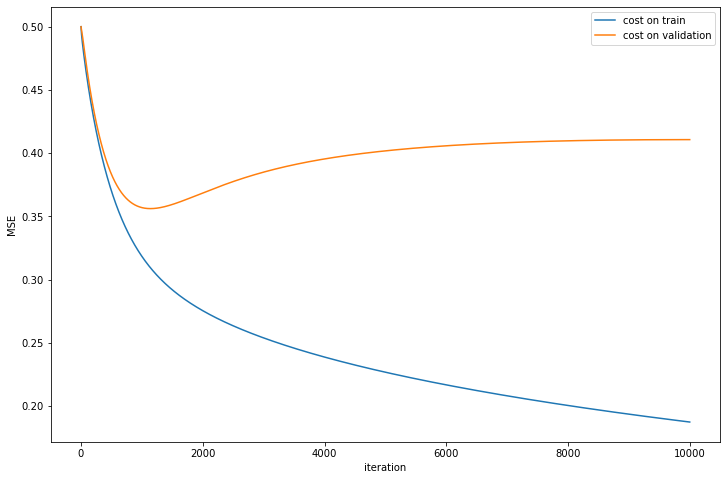

In [33]:
model1 = AdalineGD(n_iter =10000 , eta = 0.00001)
train_cost,validation_cost = model1.fit(X_train, y_train,X_validate,y_validate)
y_pred =model1.predict(X_test)

fig = plt.figure()
fig.set_size_inches(12,8)
ax = fig.add_subplot(1,1,1)
ax.plot(train_cost,label='cost on train')
ax.plot(validation_cost,label='cost on validation')
ax.legend()
ax.set_xlabel('iteration')
ax.set_ylabel('MSE')


def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy


print("accuracy of second order adaline is: " + str(accuracy(y_test,y_pred)))

def confusion_df(grand_truth, predicts):
    df = pd.DataFrame({'predict': predicts, 'actual': grand_truth, 'cnt': 1})
    return pd.crosstab(df.actual, df.predict)

confusion_df(y_test,y_pred)



In [43]:
acc_list = []
for i in range(30):
    data = pd.read_csv('dataset.csv',header = None)
    data_classes = ['R','M']
    d = {'R':-1,'M':1}
    data[60] = data[60].map(d, na_action='ignore')
    data = data.sample(frac=1)
    train, validate, test = np.split(data, [int(.7*len(data)), int(.8*len(data))])
    X_train = train.drop(60, axis=1).to_numpy()
    y_train = train[60].to_numpy()
    X_validate = validate.drop(60, axis=1).to_numpy()
    y_validate = validate[60].to_numpy()
    X_test = test.drop(60, axis=1).to_numpy()
    y_test = test[60].to_numpy()
    poly = PolynomialFeatures(2)
    X_train = poly.fit_transform(X_train)
    X_validate = poly.fit_transform(X_validate)
    X_test = poly.fit_transform(X_test)
    model1 = AdalineGD(n_iter =10000 , eta = 0.00001)
    train_cost,validation_cost = model1.fit(X_train, y_train,X_validate,y_validate)
    y_pred =model1.predict(X_test)
    acc_list.append(accuracy(y_test,y_pred))

print("accuracy of second order perceptron in 30 test is: " + str(np.mean(acc_list)))

accuracy of second order perceptron in 30 test is: 0.8182539682539682


In [17]:
train, validate, test = np.split(data, [int(.7*len(data)), int(.8*len(data))])
X_train = train.drop(60, axis=1).to_numpy()
y_train = train[60].to_numpy()
X_validate = validate.drop(60, axis=1).to_numpy()
y_validate = validate[60].to_numpy()
X_test = test.drop(60, axis=1).to_numpy()
y_test = test[60].to_numpy()

In [18]:
class AdalineGD(object):
    def __init__(self, eta = 0.01, n_iter = 50):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self,X, y,X_val,y_val):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        self.valcost_ = [] 
        for i in range(self.n_iter):
            output = self.net_input(X)
            val_output = self.net_input(X_val)
            errors = (y - output)
            val_errors = (y_val - val_output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors ** 2).sum() / (2.0*X.shape[0])
            val_cost = (val_errors ** 2).sum() / (2.0*X_val.shape[0])
            self.cost_.append(cost)
            self.valcost_.append(val_cost)
        return self.cost_,self.valcost_

    def net_input(self, X):
        """ Calculate net input """
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """ Compute linear activation """
        return self.net_input(X)
    
    def predict(self, X):
        """ Return class label after unit step """
        return np.where(self.activation(X) >= 0.0, +1,-1)

In [19]:
X_train = train.drop(60, axis=1).to_numpy()
y_train = train[60].to_numpy()
X_validate = validate.drop(60, axis=1).to_numpy()
y_validate = validate[60].to_numpy()
model1 = AdalineGD(n_iter =10000 , eta =  0.00001)
train_cost,validation_cost = model1.fit(X_train, y_train,X_validate,y_validate)

Text(0, 0.5, 'MSE')

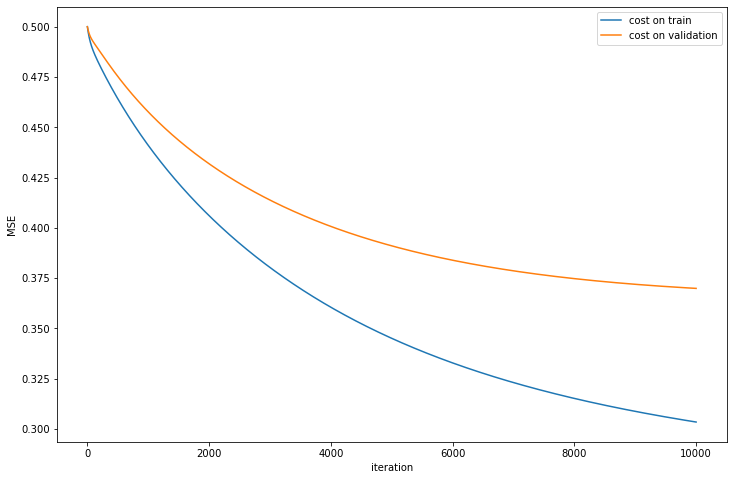

In [20]:
fig = plt.figure()
fig.set_size_inches(12,8)
ax = fig.add_subplot(1,1,1)
ax.plot(train_cost,label='cost on train')
ax.plot(validation_cost,label='cost on validation')
ax.legend()
ax.set_xlabel('iteration')
ax.set_ylabel('MSE')

In [22]:
X_test = test.drop(60, axis=1).to_numpy()
y_test = test[60].to_numpy()

y_pred =model1.predict(X_test)
accuracy(y_test,y_pred)
confusion_df(y_test,y_pred)

predict,-1,1
actual,,
-1,11,10
1,5,16
